In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
data = pd.read_csv("data_science_job.csv")
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


This dataset is a classification dataset

### Inspecting the data

In [64]:
pd.DataFrame([data.isnull().sum(), data.isnull().sum()/len(data)*100], index=["Count", "Percentage"]).T

,Count,Percentage
enrollee_id,0.0,0.000000
city,0.0,0.000000
city_development_index,479.0,2.500261
gender,4508.0,23.530640
relevent_experience,0.0,0.000000
enrolled_university,386.0,2.014824
education_level,460.0,2.401086
major_discipline,2813.0,14.683161
experience,65.0,0.339284
company_size,5938.0,30.994885


In [65]:
data.describe()

,enrollee_id,city_development_index,experience,training_hours,target
count,19158.000000,18679.000000,19093.000000,18392.000000,19158.000000
mean,16875.358179,0.828951,9.928036,65.185787,0.249348
std,9616.292592,0.123334,6.505268,59.885626,0.432647
min,1.000000,0.448000,0.000000,1.000000,0.000000
25%,8554.250000,0.740000,4.000000,23.000000,0.000000
50%,16982.500000,0.903000,9.000000,47.000000,0.000000
75%,25169.750000,0.920000,16.000000,88.000000,0.000000
max,33380.000000,0.949000,20.000000,336.000000,1.000000


The `city_development_index` has a small number of missing values and seems to be ok to fill up with the mean.

In [66]:
data["city_development_index"].fillna(data["city_development_index"].mean(), inplace=True)

C:\Users\Philemon\AppData\Local\Temp\ipykernel_5788\3842592280.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["city_development_index"].fillna(data["city_development_index"].mean(), inplace=True)


In [68]:
data["gender"].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

The null values in the `gender` column can be attributed to maybe people who didn't want to specify their gender. We can either fill these values with the most frequent value or we can create their a new category `N/A` for them.

Going with the latter option, we can fill the null values with `N/A`.

In [69]:
data["gender"].fillna("N/A", inplace=True)

C:\Users\Philemon\AppData\Local\Temp\ipykernel_5788\2696683387.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["gender"].fillna("N/A", inplace=True)


In [71]:
data["enrolled_university"].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

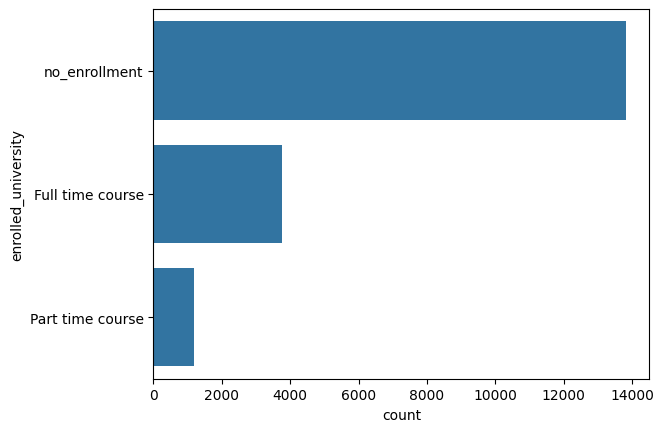

In [72]:
sns.countplot(data["enrolled_university"])
plt.show()

This shows the most frequent field in the `enrolled_university` column is `no_enrollment`. We can fill the null values with `no_enrollment`.

In [73]:
data["enrolled_university"].fillna("no_enrollment", inplace=True)

C:\Users\Philemon\AppData\Local\Temp\ipykernel_5788\2000552213.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["enrolled_university"].fillna("no_enrollment", inplace=True)


<Axes: xlabel='count', ylabel='education_level'>

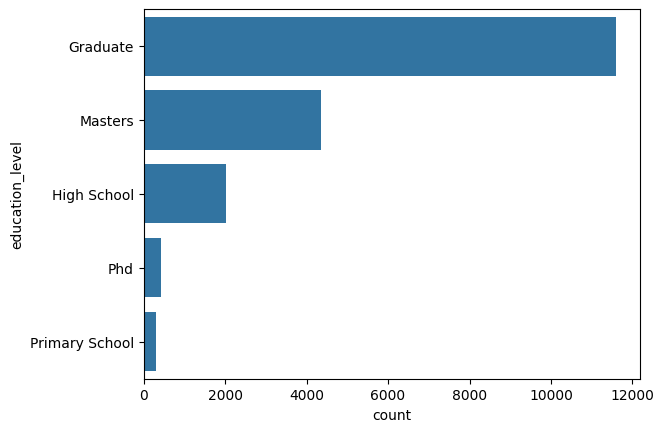

In [75]:
sns.countplot(data["education_level"])

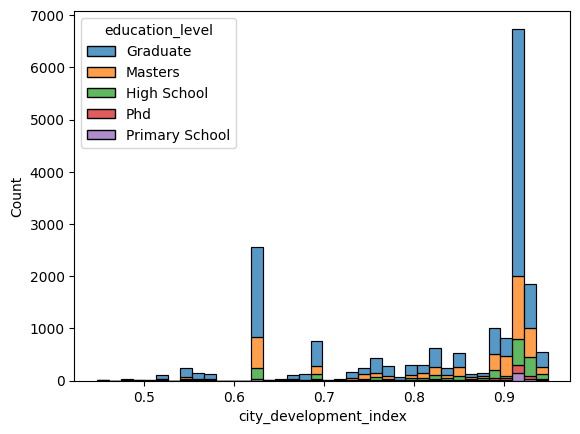

In [76]:
sns.histplot(data, x = "city_development_index", hue="education_level", multiple="stack")
plt.show()

From this we can infer that more people went ahead to do their `Graduate` degree but didn't proceed to their `Masters` degree.

The people from the cities that had high developement index were most likely to have a `Graduate` degree.

The null values in the education level could depict that a person didn't have formal education. So we can fill the null values with `no_education`. But these values have to be consistent with if the person actually went to university or not. So we can fill the null values with `no_education` if the person didn't go to university and can fill it with `Graduate` if the person did infact go to university.

In [77]:
data["education_level"] = ["no_education" if y == "no_enrollment" and type(x) == float else "Graduate" if type(x) == float else x for x, y in zip(data["education_level"], data["enrolled_university"])]

In [85]:
data["experience"].value_counts()

experience
20.0    3434
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
1.0      549
0.0      522
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
Name: count, dtype: int64

For the experience since there are relatively a very small number of missing entries, they would be filled with the median of the distribution.

In [86]:
data["experience"] = data["experience"].fillna(data["experience"].median())

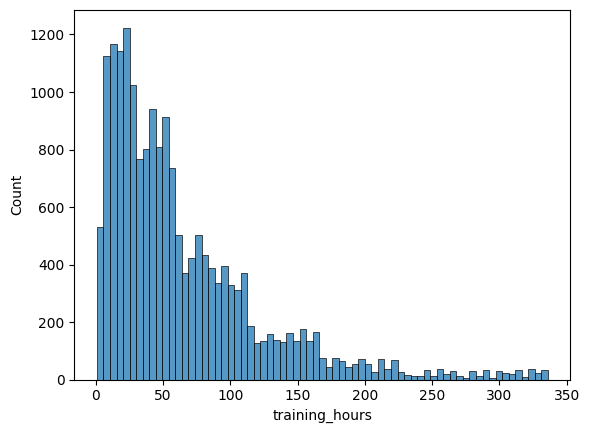

count    18392.000000
mean        65.185787
std         59.885626
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

In [92]:
sns.histplot(data["training_hours"])
plt.show()
data["training_hours"].describe()

With this it shows that the training hours were more frequent the on the lower side. This makes sense because not everyone would be committed to training for a long time.

For this distribution, we can fill the missing values with the mean of the distribution.

In [93]:
data["training_hours"] = data["training_hours"].fillna(data["training_hours"].mean())

The remaining missing values have more impact on the dataset so should be taken care of critically.

In [96]:
data["major_discipline"].value_counts()

major_discipline
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64

#### Major Discipline

There's possibility that the people with null values in this column are not from a discipline that is listed in the column. This could be a reason why they have null values. If that is the case they can be safely filled with `Other`.

The mode of the distribution which is `STEM` is also a good candidate for filling the missing values. Since this dataset is for data science jobs, it makes sense that most of the entries into the dataset are from the STEM field.

So the entries that have enrollment into universities can be filled with `STEM` and the ones that do not have any education can be filled with with `No Major`.

In [98]:
data["major_discipline"] = data["major_discipline"].fillna("STEM")

In [101]:
data["major_discipline"] = ["No Major" if x == "no_education" else y for x, y in zip(data["education_level"], data["major_discipline"])]

In [104]:
data["company_size"].value_counts()

company_size
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: count, dtype: int64

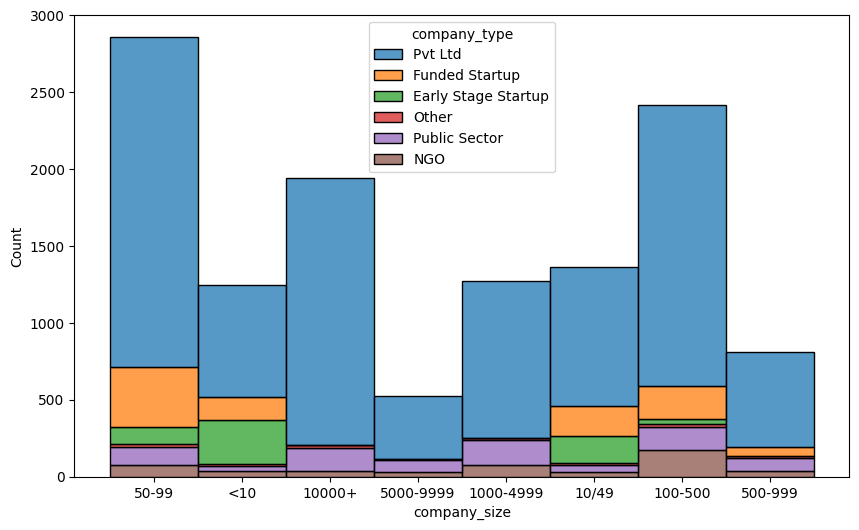

In [112]:
plt.figure(figsize=(10, 6))
sns.histplot(data, x="company_size", hue="company_type", multiple="stack")
plt.show()

In [127]:
data[data["company_size"].isnull()][["company_size", "company_type",]].head(40)

,company_size,company_type
0,NaN,NaN
2,NaN,NaN
3,NaN,Pvt Ltd
5,NaN,NaN
10,NaN,NaN
13,NaN,NaN
14,NaN,NaN
19,NaN,NaN
22,NaN,NaN
25,NaN,NaN


This shows there is a relation between the entries that do not have a `company_size` and a `company_type`. This could mean the person involved has not had a company to work at, hence cannot fill in the information regarding to the company. So we can fill in the missing values for both places as `No Company`.

In [134]:
data["company_size"] = data["company_size"].fillna("No Company")
data["company_type"] = data["company_type"].fillna("No Company")

In [136]:
pd.DataFrame([data.isnull().sum(), data.isnull().sum()/len(data)*100], index=["Count", "Percentage"]).T

,Count,Percentage
enrollee_id,0.0,0.0
city,0.0,0.0
city_development_index,0.0,0.0
gender,0.0,0.0
relevent_experience,0.0,0.0
enrolled_university,0.0,0.0
education_level,0.0,0.0
major_discipline,0.0,0.0
experience,0.0,0.0
company_size,0.0,0.0


So now there are no more null values present in the dataset.

## Encoding the dataset

In [140]:
data.select_dtypes(include="object").columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type'],
      dtype='object')

In [142]:
for col in data.select_dtypes(include="object").columns:
    print(f"{col}: {data[col].nunique()}")

city: 123
gender: 4
relevent_experience: 2
enrolled_university: 3
education_level: 6
major_discipline: 6
company_size: 9
company_type: 7


For the categorical columns, **One-Hot Encoding** is going to be used:
* gender
* major_discipline
* company_type

For the ordinal columns, **Ordinal Encoding** is going to be used:
* education_level
* company_size

For the remaining columns, **Label Encoding** is going to be used:
* city
* relevent_experience
* enrolled_university

In [143]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [148]:
le = LabelEncoder()
hot = OneHotEncoder()

In [ ]:
labels = ["city", "relevent_experience", "enrolled_university"]
onehot = ["gender", "major_discipline", "company_type"]
ordinal = ["education_level", "company_size"]
for col in labels:
    data[col] = le.fit_transform(data[col])
for col in onehot:
    encoded = hot.fit_transform(data[col].values.reshape(-1, 1)).toarray()
    encoded = pd.DataFrame(encoded, columns=hot.get_feature_names_out())
    data = pd.concat([data, encoded], axis=1)
    data.drop(columns=col,  inplace=True)


KeyError: 'gender'

In [155]:
data["education_level"].unique()

array(['Graduate', 'Masters', 'High School', 'no_education', 'Phd',
       'Primary School'], dtype=object)

In [160]:
oe = OrdinalEncoder(categories=[["Phd", "Masters", "Graduate", "High School", "Primary School", "no_education"]])
data["education_level"] = oe.fit_transform(data["education_level"].values.reshape(-1, 1))
oe = OrdinalEncoder(categories=[["No Company", "<10", "10/49", "50-99", "100-500", "500-999", "1000-4999", "5000-9999", "10000+"]])
data["company_size"] = oe.fit_transform(data["company_size"].values.reshape(-1, 1))

In [175]:
x = data.drop(columns=["target", "enrollee_id"])
y = data["target"]

In [176]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [177]:
from sklearn.ensemble import RandomForestClassifier
random_model = RandomForestClassifier()
random_model.fit(x_train, y_train)
random_model.score(x_test, y_test)

0.7802713987473904

In [178]:
random_model.feature_importances_

array([0.10440345, 0.18714646, 0.02013326, 0.03018054, 0.05752644,
       0.14310339, 0.09046136, 0.24825521, 0.00792121, 0.0126673 ,
       0.01221316, 0.00255673, 0.002758  , 0.003667  , 0.00469974,
       0.00403221, 0.00364082, 0.00857142, 0.00329842, 0.00421355,
       0.00346509, 0.02162312, 0.00199729, 0.00480806, 0.01665677])

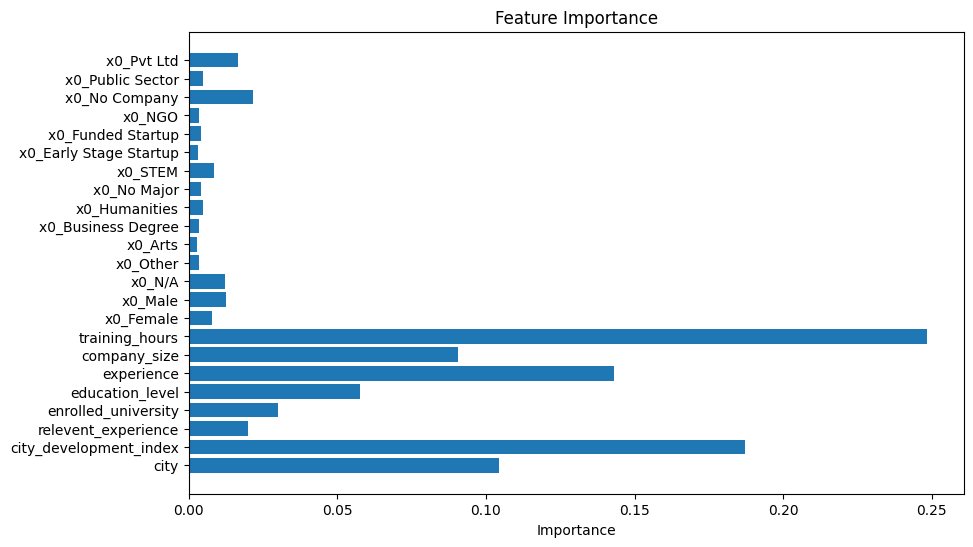

In [179]:
plt.figure(figsize=(10, 6))
plt.barh(x.columns, random_model.feature_importances_)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()